<a href="https://colab.research.google.com/github/Melmissymelissa/Project-2-Statistical-Significance---Pricing-Factors---House-Prices/blob/main/house_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Property Investment Allocation Using Statistical Analysis

##Overview
 This project aims to analyze the housing market in Ames Iowa. We will explore the key factors affecting property values, such as location, quality, and neighborhood characteristics. We'll analyze how we should allocate reserved dollars for investment into mortgage-backed securities using statistical analysis.

## About the Dataset
Widely recognize far is high quality and accuracy, the Ames, Iowa housing dataset includes a wide range of variables making it the ideal choice when predicting housing prices, understanding market trends and exploring the impact of different factors on property values.
This dataset contains 1,560 rows and 25 main columns
[Link to dataset here](https:/https://drive.google.com/file/d/15ACicjV6RxxTB0YJlOuxc_v7Hsg1UN2b/view?usp=drive_link/)

In [1]:
# import & alias modules
import math
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
drive.mount('/content/gdrive')
sns.set()
pd.set_option('display.max_colwidth', None)

Mounted at /content/gdrive


### Bringing in the Dataset

In [2]:
#read in data
hp_df = pd.read_csv("/content/gdrive/MyDrive/My Data Analyst Portfolio/Project 2: Statistical Significance - Pricing Factors - House Prices/raw_data.csv")
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
missing_values_per_column = hp_df.isnull().sum()
print(missing_values_per_column)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [4]:
hp_df.head() # see the first 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
hp_df.describe().round() # see the descriptive statistics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [6]:
# Creating a new field
hp_df['Price per sq ft'] = hp_df['SalePrice'] / hp_df['LotArea'] # calculating the price by sq ft
print(hp_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  Price per sq ft  
0       WD         Norma

### Exploring the Data
EDA involved exploring the data to answer these questions:

<ipython-input-19-c48f20c4b398>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hp_df.corr()


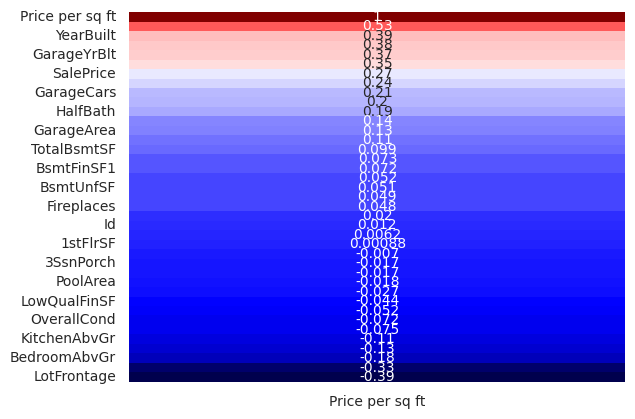

In [19]:
corr_matrix = hp_df.corr()

# the correlation values of Price per sq ft with other columns
ppsf_corr = corr_matrix['Price per sq ft']

# sorting the correlation values in descending order
ppsf_corr_sorted = ppsf_corr.sort_values(ascending=False)

sns.heatmap(ppsf_corr_sorted.to_frame(), annot=True, cmap='seismic', cbar=False, annot_kws={"size": 10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

What catagories are highly associated with a higher sale price?

<ipython-input-18-23d865d43ff7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hp_df.corr()


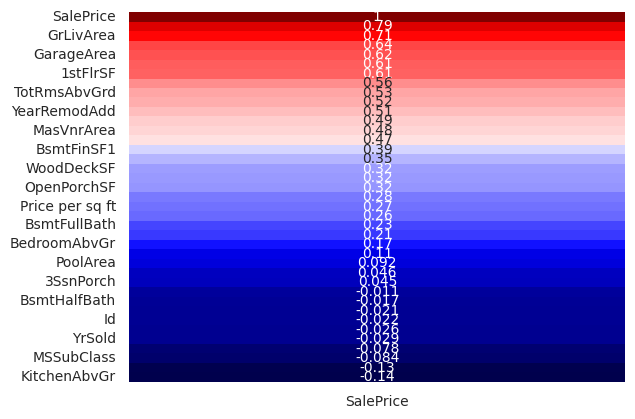

In [18]:
corr_matrix = hp_df.corr()

# the correlation values of SalePrice with other columns
saleprice_corr = corr_matrix['SalePrice']

# sorting the correlation values in descending order
saleprice_corr_sorted = saleprice_corr.sort_values(ascending=False)

sns.heatmap(saleprice_corr_sorted.to_frame(), annot=True, cmap='seismic', cbar=False, annot_kws={"size": 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

I noticed that a higher over quality score, larger living areas, a larger garage that can accomadate more cars, a larger basement area and a larger first floor area tends to be associated with a higher sale price

(recap of catagories)
- 'OverallQual': This represents the overall material and finish quality of the house.
- 'GrLivArea': This refers to the above ground living area in square feet.
- 'GarageCars': This indicates the size of the garage in terms of car capacity.
- 'GarageArea': This represents the size of the garage in square feet.
- 'TotalBsmtSF': This refers to the total square footage of the basement.
- '1stFlrSF': This represents the total square footage of the first floor.

In [20]:
# What is the average Overall Quality score, Ground Living Area, Garage Cars, Garage Area, TotalbsmtSF and 1stFlrSF?
hp_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000


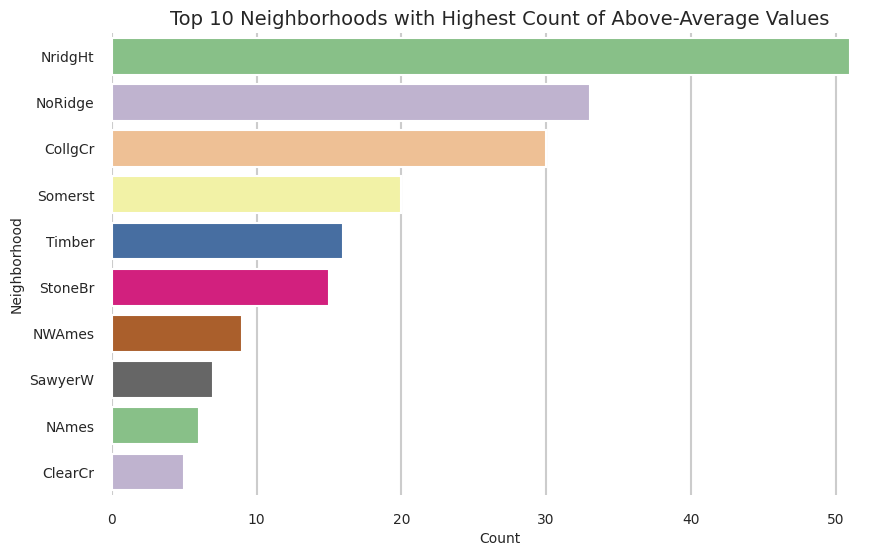

In [25]:
# taking the average values for the columns
average_values = hp_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']].mean()

# Filtering the DataFrame to include only rows where the values are above average
filtered_df = hp_df[(hp_df['OverallQual'] > average_values['OverallQual']) &
                    (hp_df['GrLivArea'] > average_values['GrLivArea']) &
                    (hp_df['GarageCars'] > average_values['GarageCars']) &
                    (hp_df['GarageArea'] > average_values['GarageArea']) &
                    (hp_df['TotalBsmtSF'] > average_values['TotalBsmtSF']) &
                    (hp_df['1stFlrSF'] > average_values['1stFlrSF'])]

neighborhood_counts = filtered_df['Neighborhood'].value_counts()

# top 10 neighborhoods with the highest count
top_10_neighborhoods_avg_values = neighborhood_counts.head(10)

color_palette = sns.color_palette("Accent", len(top_10_neighborhoods_avg_values))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighborhoods_avg_values.values, y=top_10_neighborhoods_avg_values.index, palette=color_palette)

# Set labels and title
plt.xlabel('Count', fontsize=10)
plt.ylabel('Neighborhood', fontsize=10)
plt.title('Top 10 Neighborhoods with Highest Count of Above-Average Values', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove spines
sns.despine(left=True, right=True, top=True, bottom=True)

# Show the plot
plt.show()


### What are the top 10 Neighborhoods with the highest Average Price Per Sq Ft

In [26]:
neighborhood_avg_price = hp_df.groupby('Neighborhood')['Price per sq ft'].mean() # Groups the data by neighborhood and calculate the average price per sq ft

top_10_neighborhoods_by_avg_price = neighborhood_avg_price.nlargest(10) # returns the top 10 neighborhoods by average price per sq ft

print(top_10_neighborhoods_by_avg_price)

Neighborhood
Blueste    86.410256
BrDale     58.323157
Blmngtn    57.643934
NPkVill    49.577688
MeadowV    45.394765
StoneBr    36.074463
Somerst    35.461897
NridgHt    31.426916
NoRidge    25.668164
CollgCr    21.393421
Name: Price per sq ft, dtype: float64


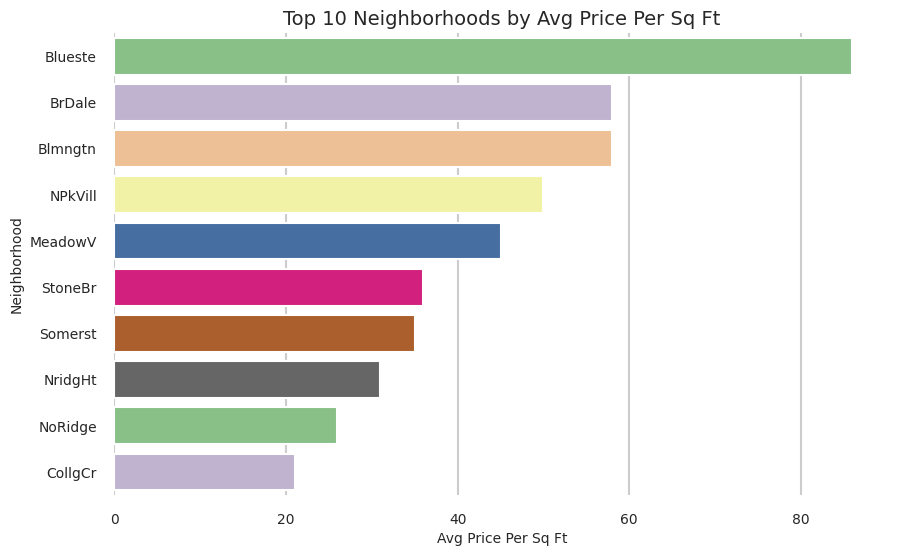

In [28]:
top_10_neighborhoods_by_avg_price = hp_df.groupby('Neighborhood')['Price per sq ft'].mean().nlargest(10).round()

sns.set(style='whitegrid', palette=None)
sns.set_context('talk')

color_palette = sns.color_palette("Accent", len(top_10_neighborhoods_by_avg_price))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighborhoods_by_avg_price.values, y=top_10_neighborhoods_by_avg_price.index, palette=color_palette)

plt.xlabel('Avg Price Per Sq Ft', fontsize=10)
plt.ylabel('Neighborhood', fontsize=10)
plt.title('Top 10 Neighborhoods by Avg Price Per Sq Ft', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.despine(left=True, right=True, top=True, bottom=True)


plt.show()

In [29]:
# top 10 neighborhoods with the most count of above average Overallqual

top_10_neighborhoods_aaq = hp_df[hp_df['OverallQual'] > hp_df['OverallQual'].mean()].groupby('Neighborhood')['OverallQual'].count().nlargest(10).round()
print(top_10_neighborhoods_aaq)

Neighborhood
CollgCr    97
NridgHt    75
Somerst    75
Gilbert    42
NoRidge    41
NWAmes     29
Timber     27
SawyerW    26
StoneBr    25
OldTown    21
Name: OverallQual, dtype: int64


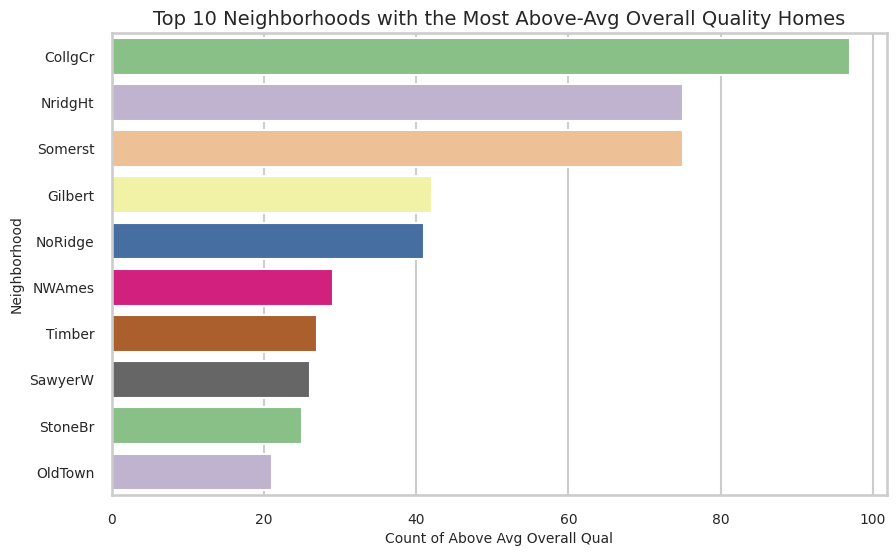

In [30]:
#bar chart on top_10_neighborhoods w/ the most above-avg overall quality scored homes
color_palette = sns.color_palette("Accent", len(top_10_neighborhoods_aaq))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighborhoods_aaq.values, y=top_10_neighborhoods_aaq.index, palette=color_palette)

plt.xlabel('Count of Above Avg Overall Qual', fontsize=10)
plt.ylabel('Neighborhood', fontsize=10)
plt.title('Top 10 Neighborhoods with the Most Above-Avg Overall Quality Homes', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()


# Analysis

### Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average GrLivArea homes and below average GrLivArea homes. Ha: μ1 - μ2 ≠ 0

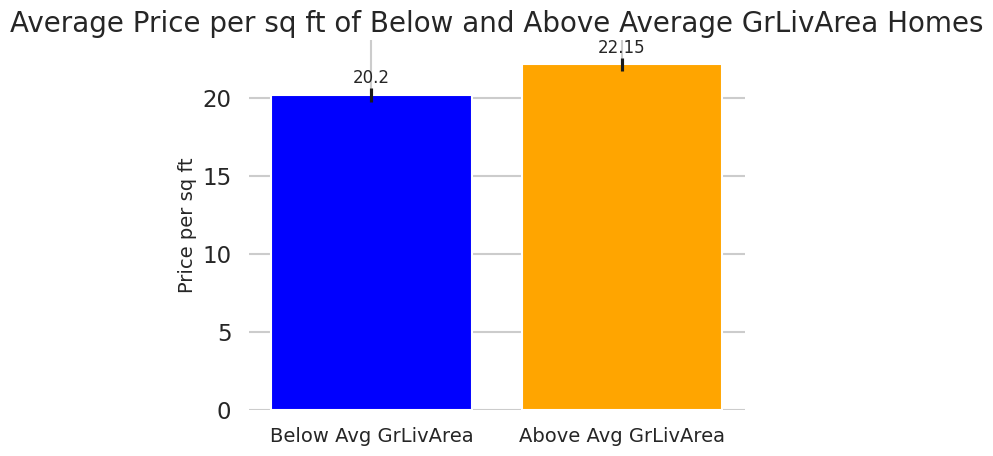

T-Statistic: 2.992848135582781
P-Value: 0.0028103503119564703
Confidence Interval (95%): (0.17402676194912492, 3.718238225649853)


In [58]:
# splitting the data for a t-test into 2 samples on GrLivArea
above_avg_GrLivArea_df = hp_df[hp_df['GrLivArea'] > hp_df['GrLivArea'].mean()]  # sample of above average GrLivArea
below_avg_GrLivArea_df = hp_df[hp_df['GrLivArea'] <= hp_df['GrLivArea'].mean()]  # sample of below average GrLivArea

# running t-test
t_statistic, p_value = stats.ttest_ind(above_avg_GrLivArea_df["Price per sq ft"], below_avg_GrLivArea_df["Price per sq ft"])

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(above_avg_GrLivArea_df["Price per sq ft"]) + len(below_avg_GrLivArea_df["Price per sq ft"]) - 2,
                      loc=above_avg_GrLivArea_df["Price per sq ft"].mean() - below_avg_GrLivArea_df["Price per sq ft"].mean(),
                      scale=stats.sem(above_avg_GrLivArea_df["Price per sq ft"]) + stats.sem(below_avg_GrLivArea_df["Price per sq ft"]))

x = ['Below Avg GrLivArea', 'Above Avg GrLivArea']
y = [below_avg_GrLivArea_df["Price per sq ft"].mean(), above_avg_GrLivArea_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_GrLivArea_df["Price per sq ft"]), stats.sem(above_avg_GrLivArea_df["Price per sq ft"])]

colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Average Price per sq ft of Below and Above Average GrLivArea Homes', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)


plt.show()
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Confidence Interval (95%):", ci)

The results of the t-test indicate a statistically significant difference in the price per sq ft between homes with above-average and below-average GrLivArea. The confidence interval (0.17, 3.70) suggests that, on average, homes with above-average GrLivArea have a price per sq ft that is between approximately 0.17 and 3.70 higher than homes with below-average GrLivArea. The low p-value (0.0028) provides strong evidence against the null hypothesis, supporting the conclusion of a significant difference in prices.

### Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average GarageCars homes and below average GarageCars homes. Ha: μ1 - μ2 ≠ 0

T-Statistic: -7.439617205278832
P-Value: 1.7169569452861894e-13
Confidence Interval (95%): (3.3457198899038554, 6.911603464508366)


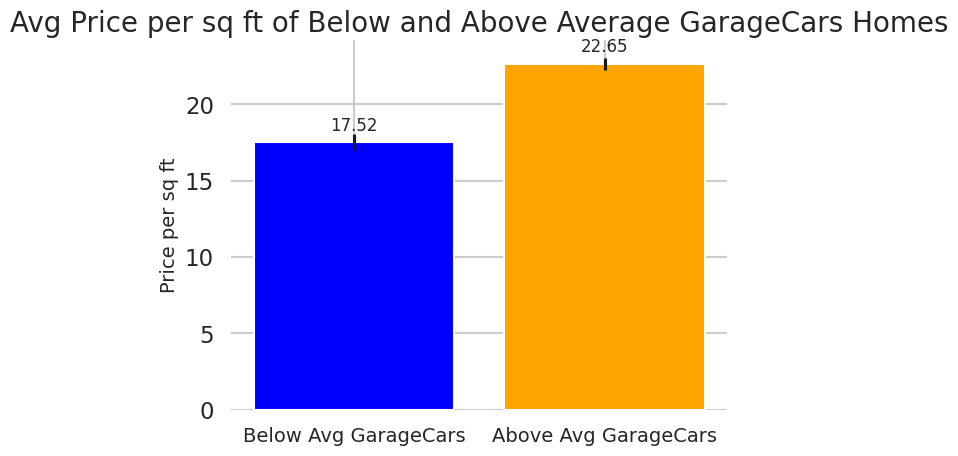

In [64]:
# Splitting the data for a t-test into 2 samples on GarageCars
above_avg_GarageCars_df = hp_df[hp_df['GarageCars'] > hp_df['GarageCars'].mean()]  # sample of above average GarageCars
below_avg_GarageCars_df = hp_df[hp_df['GarageCars'] <= hp_df['GarageCars'].mean()]  # sample of below average GarageCars

#  t-test
t_statistic, p_value = stats.ttest_ind(below_avg_GarageCars_df["Price per sq ft"], above_avg_GarageCars_df["Price per sq ft"])

ci = stats.t.interval(0.95, len(below_avg_GarageCars_df["Price per sq ft"]) + len(above_avg_GarageCars_df["Price per sq ft"]) - 2,
                      loc=abs(below_avg_GarageCars_df["Price per sq ft"].mean() - above_avg_GarageCars_df["Price per sq ft"].mean()),
                      scale=stats.sem(below_avg_GarageCars_df["Price per sq ft"]) + stats.sem(above_avg_GarageCars_df["Price per sq ft"]))

x = ['Below Avg GarageCars', 'Above Avg GarageCars']
y = [below_avg_GarageCars_df["Price per sq ft"].mean(), above_avg_GarageCars_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_GarageCars_df["Price per sq ft"]), stats.sem(above_avg_GarageCars_df["Price per sq ft"])]
colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Avg Price per sq ft of Below and Above Average GarageCars Homes', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Confidence Interval (95%):", ci)

The results of the analysis indicate a statistically significant difference in the average price per square foot between houses with below average GarageCars and houses with above average GarageCars. The confidence interval of (3.3 - 6.9) suggests that, with 95% confidence, the average price per square foot for houses with above average GarageCars is estimated to be higher by approximately 3.34 to 6.90 compared to houses with below average GarageCars. Additionally, the very small p-value of 1.72e-13 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

### Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average GarageArea homes and below average GarageArea homes. Ha: μ1 - μ2 ≠ 0

Confidence Interval: (0.35621065319793965, 2.91353569633234)
TtestResult(statistic=-2.5250129803552217, pvalue=0.011674717574815582, df=1458.0)


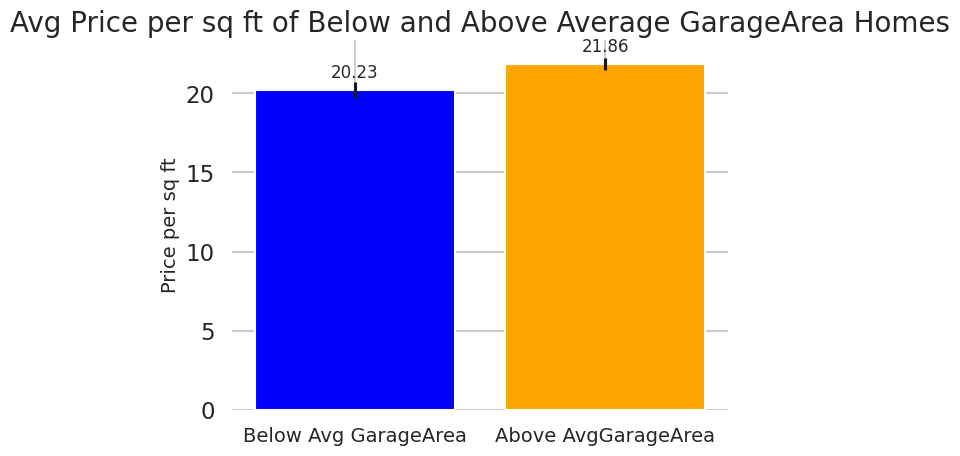

In [66]:
### splitting the data for a t-test into 2 samples on GarageArea
above_avg_GarageArea_df = hp_df[hp_df['GarageArea'] > hp_df['GarageArea'].mean()]  # sample of above average GarageArea
below_avg_GarageArea_df = hp_df[hp_df['GarageArea'] <= hp_df['GarageArea'].mean()]  # sample of below average GarageArea

# t-test
t_test = stats.ttest_ind(below_avg_GarageArea_df["Price per sq ft"], above_avg_GarageArea_df["Price per sq ft"])

# confidence interval
n1 = len(below_avg_GarageArea_df["Price per sq ft"])
n2 = len(above_avg_GarageArea_df["Price per sq ft"])
df = n1 + n2 - 2
alpha = 0.05
std1 = below_avg_GarageArea_df["Price per sq ft"].std()
std2 = above_avg_GarageArea_df["Price per sq ft"].std()
mean1 = below_avg_GarageArea_df["Price per sq ft"].mean()
mean2 = above_avg_GarageArea_df["Price per sq ft"].mean()
std_error = ((std1 ** 2) / n1 + (std2 ** 2) / n2) ** 0.5
margin_error = stats.t.ppf(1 - alpha / 2, df) * std_error
confidence_interval = (abs(mean1 - mean2) - margin_error, abs(mean1 - mean2) + margin_error)

x = ['Below Avg GarageArea', 'Above AvgGarageArea']
y = [below_avg_GarageArea_df["Price per sq ft"].mean(), above_avg_GarageArea_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_GarageArea_df["Price per sq ft"]), stats.sem(above_avg_GarageArea_df["Price per sq ft"])]
colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Avg Price per sq ft of Below and Above Average GarageArea Homes', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("Confidence Interval:", confidence_interval)
print(t_test)

The results of the analysis indicate a statistically significant difference in the average price per square foot between houses with below average GarageArea and houses with above average GarageArea. The confidence interval of (0.35-2.91) suggests that, with 95% confidence, the average price per square foot for houses with above average GarageArea is estimated to be higher by approximately 0.36 to 3 dollars compared to houses with below average GarageArea. Additionally, the p-value of 0.0117 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

### Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average TotalBsmtSF homes and below average TotalBsmtSF homes. Ha: μ1 - μ2 ≠ 0

Confidence Interval: (1.322880820507676, 3.83874264637725)
TtestResult(statistic=-3.958676959322372, pvalue=7.89963178057247e-05, df=1458.0)


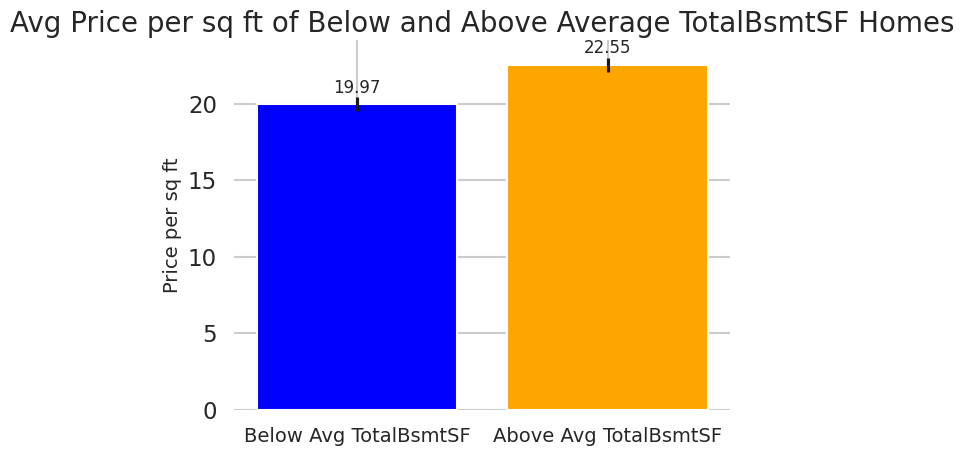

In [67]:
above_avg_TotalBsmtSF_df = hp_df[hp_df['TotalBsmtSF'] > hp_df['TotalBsmtSF'].mean()]  # sample of above average TotalBsmtSF
below_avg_TotalBsmtSF_df = hp_df[hp_df['TotalBsmtSF'] <= hp_df['TotalBsmtSF'].mean()]  # sample of below average TotalBsmtSF

t_test = stats.ttest_ind(below_avg_TotalBsmtSF_df["Price per sq ft"], above_avg_TotalBsmtSF_df["Price per sq ft"])


n1 = len(below_avg_TotalBsmtSF_df["Price per sq ft"])
n2 = len(above_avg_TotalBsmtSF_df["Price per sq ft"])
df = n1 + n2 - 2
alpha = 0.05
std1 = below_avg_TotalBsmtSF_df["Price per sq ft"].std()
std2 = above_avg_TotalBsmtSF_df["Price per sq ft"].std()
mean1 = below_avg_TotalBsmtSF_df["Price per sq ft"].mean()
mean2 = above_avg_TotalBsmtSF_df["Price per sq ft"].mean()
std_error = ((std1 ** 2) / n1 + (std2 ** 2) / n2) ** 0.5
margin_error = stats.t.ppf(1 - alpha / 2, df) * std_error
confidence_interval = (abs(mean1 - mean2) - margin_error, abs(mean1 - mean2) + margin_error)

x = ['Below Avg TotalBsmtSF', 'Above Avg TotalBsmtSF']
y = [below_avg_TotalBsmtSF_df["Price per sq ft"].mean(), above_avg_TotalBsmtSF_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_TotalBsmtSF_df["Price per sq ft"]), stats.sem(above_avg_TotalBsmtSF_df["Price per sq ft"])]
colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Avg Price per sq ft of Below and Above Average TotalBsmtSF Homes', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("Confidence Interval:", confidence_interval)
print(t_test)

The results indicate a statistically significant difference in the average price per square foot between houses with below average TotalBsmtSF and houses with above average TotalBsmtSF. The confidence interval of (1.32-3.8) suggests that, with 95% confidence, the average price per square foot for houses with above average TotalBsmtSF is estimated to be higher by approximately 1 to 4 dollars compared to houses with below average TotalBsmtSF. Additionally, the small p-value of 7.89e-05 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

### Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average 1stFlrSF homes and below average 1stFlrSF homes. Ha: μ1 - μ2 ≠ 0

Confidence Interval: (0.5200708611506362, 3.0496910906601253)
TtestResult(statistic=-2.7212768852055595, pvalue=0.006580396298948954, df=1458.0)


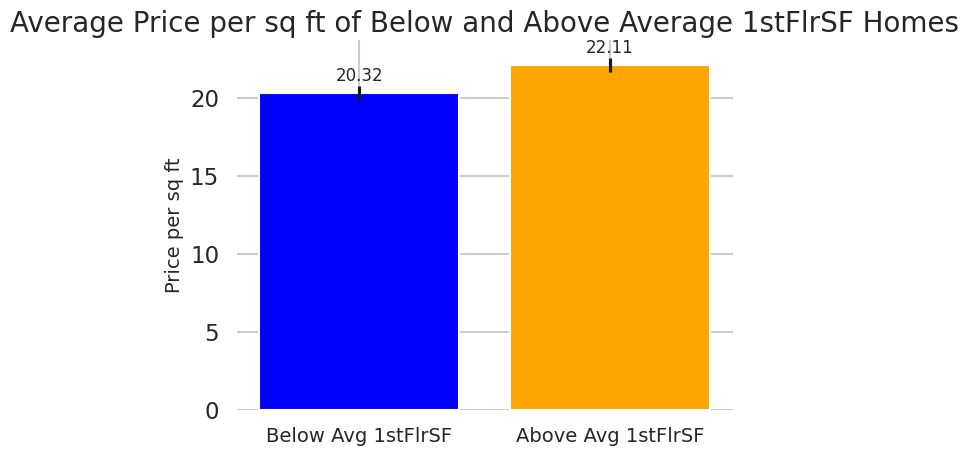

In [68]:
# Spliting the data for a t-test into 2 samples on 1stFlrSF
above_avg_1stFlrSF_df = hp_df[hp_df['1stFlrSF'] > hp_df['1stFlrSF'].mean()] #sample of above average 1stFlrSF
below_avg_1stFlrSF_df = hp_df[hp_df['1stFlrSF'] <= hp_df['1stFlrSF'].mean()] #sample of above below average 1stFlrSF
# run two sample t-test
t_test = stats.ttest_ind(below_avg_1stFlrSF_df["Price per sq ft"], above_avg_1stFlrSF_df["Price per sq ft"])
#CI
n1 = len(below_avg_1stFlrSF_df["Price per sq ft"])
n2 = len(above_avg_1stFlrSF_df["Price per sq ft"])
df = n1 + n2 - 2
alpha = 0.05  # 95% confidence level
std1 = below_avg_1stFlrSF_df["Price per sq ft"].std()
std2 = above_avg_1stFlrSF_df["Price per sq ft"].std()
mean1 = below_avg_1stFlrSF_df["Price per sq ft"].mean()
mean2 = above_avg_1stFlrSF_df["Price per sq ft"].mean()
std_error = ((std1 ** 2) / n1 + (std2 ** 2) / n2) ** 0.5
margin_error = stats.t.ppf(1 - alpha / 2, df) * std_error
confidence_interval = (abs(mean1 - mean2) - margin_error, abs(mean1 - mean2) + margin_error)


x = ['Below Avg 1stFlrSF', 'Above Avg 1stFlrSF']
y = [below_avg_1stFlrSF_df["Price per sq ft"].mean(), above_avg_1stFlrSF_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_1stFlrSF_df["Price per sq ft"]), stats.sem(above_avg_1stFlrSF_df["Price per sq ft"])]
colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Average Price per sq ft of Below and Above Average 1stFlrSF Homes', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("Confidence Interval:", confidence_interval)
print(t_test)

The results indicate a statistically significant difference in the average price per square foot between houses with below average 1stFlrSF and houses with above average 1stFlrSF. The confidence interval of (0.52-3.04) suggests that, with 95% confidence, the average price per square foot for houses with above average 1stFlrSF is estimated to be higher by approximately 0.50-3 dollars compared to houses with below average 1stFlrSF. Additionally, the small p-value of 0.00658 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

## Hypothesis 1
Alternative Hypothesis(Ha): There is a significant difference in price per sq ft between above average condition homes and below average condition homes.
Ha: μ1 - μ2 ≠ 0

Confidence Interval: is between 3.160592296010414 and 5.5695923996644225.
TtestResult(statistic=6.621774046823013, pvalue=4.975769442992083e-11, df=1458.0)


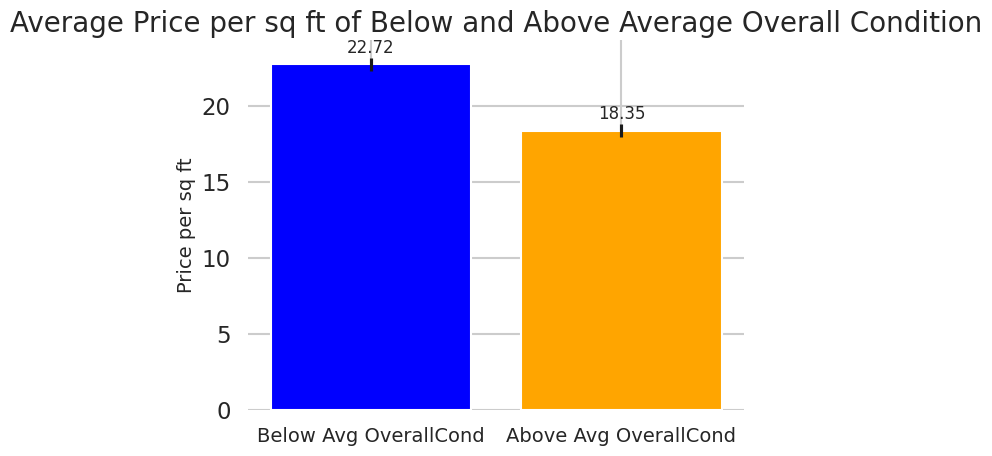

In [69]:
# Spliting the data for a t-test into 2 samples
above_avg_cond_df = hp_df[hp_df['OverallCond'] > hp_df['OverallCond'].mean()] #sample of above average Overall Condition score
below_avg_cond_df = hp_df[hp_df['OverallCond'] <= hp_df['OverallCond'].mean()] #sample of above below Overall Condition score
# run two sample t-test
t_test = stats.ttest_ind(below_avg_cond_df["Price per sq ft"], above_avg_cond_df["Price per sq ft"])

#confidence interval range for the difference in means
sample_01_n = above_avg_cond_df.shape[0]
sample_02_n = below_avg_cond_df.shape[0]
sample_01_mean = above_avg_cond_df['Price per sq ft'].mean()
sample_02_mean = below_avg_cond_df['Price per sq ft'].mean()
sample_01_var = above_avg_cond_df['Price per sq ft'].var()
sample_02_var = below_avg_cond_df['Price per sq ft'].var()

std_err_difference = math.sqrt((sample_01_var/sample_01_n)+(sample_02_var/sample_02_n))

mean_difference = sample_02_mean - sample_01_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

x = ['Below Avg OverallCond', 'Above Avg OverallCond']
y = [below_avg_cond_df["Price per sq ft"].mean(), above_avg_cond_df["Price per sq ft"].mean()]
error = [stats.sem(below_avg_cond_df["Price per sq ft"]), stats.sem(above_avg_cond_df["Price per sq ft"])]
colors = ['blue', 'orange']

plt.bar(x, y, yerr=error, color=colors)
plt.ylabel('Price per sq ft', fontsize=14)
plt.title('Average Price per sq ft of Below and Above Average Overall Condition', fontsize=20)

for i, v in enumerate(y):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("Confidence Interval: is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print(t_test)


With 95% confidence, there is a statistically significant difference in the average price per square foot between above average condition homes and below condition homes. The confidence interval (CI) of 3.16 to 5.5 suggests that, on average, the price per square foot for below average condition homes is higher by that amount compared to above average condition homes

## Hypothesis 2:
### Ha:  There is a significant difference in price per sq ft between above average quality homes and below average quality homes.
Ha: μ1 - μ2 ≠ 0

In [70]:
# Spliting the data for a t-test into 2 samples
above_avg_quality_df = hp_df[hp_df['OverallQual'] > hp_df['OverallQual'].mean()] #sample of above average Overall Quality score
below_avg_quality_df = hp_df[hp_df['OverallQual'] <= hp_df['OverallQual'].mean()] #sample of above below Overall Quality score

In [ ]:
above_avg_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 1457
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               548 non-null    int64  
 1   MSSubClass       548 non-null    int64  
 2   MSZoning         548 non-null    object 
 3   LotFrontage      467 non-null    float64
 4   LotArea          548 non-null    int64  
 5   Street           548 non-null    object 
 6   Alley            29 non-null     object 
 7   LotShape         548 non-null    object 
 8   LandContour      548 non-null    object 
 9   Utilities        548 non-null    object 
 10  LotConfig        548 non-null    object 
 11  LandSlope        548 non-null    object 
 12  Neighborhood     548 non-null    object 
 13  Condition1       548 non-null    object 
 14  Condition2       548 non-null    object 
 15  BldgType         548 non-null    object 
 16  HouseStyle       548 non-null    object 
 17  OverallQual    

In [ ]:
below_avg_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 1 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               912 non-null    int64  
 1   MSSubClass       912 non-null    int64  
 2   MSZoning         912 non-null    object 
 3   LotFrontage      734 non-null    float64
 4   LotArea          912 non-null    int64  
 5   Street           912 non-null    object 
 6   Alley            62 non-null     object 
 7   LotShape         912 non-null    object 
 8   LandContour      912 non-null    object 
 9   Utilities        912 non-null    object 
 10  LotConfig        912 non-null    object 
 11  LandSlope        912 non-null    object 
 12  Neighborhood     912 non-null    object 
 13  Condition1       912 non-null    object 
 14  Condition2       912 non-null    object 
 15  BldgType         912 non-null    object 
 16  HouseStyle       912 non-null    object 
 17  OverallQual    

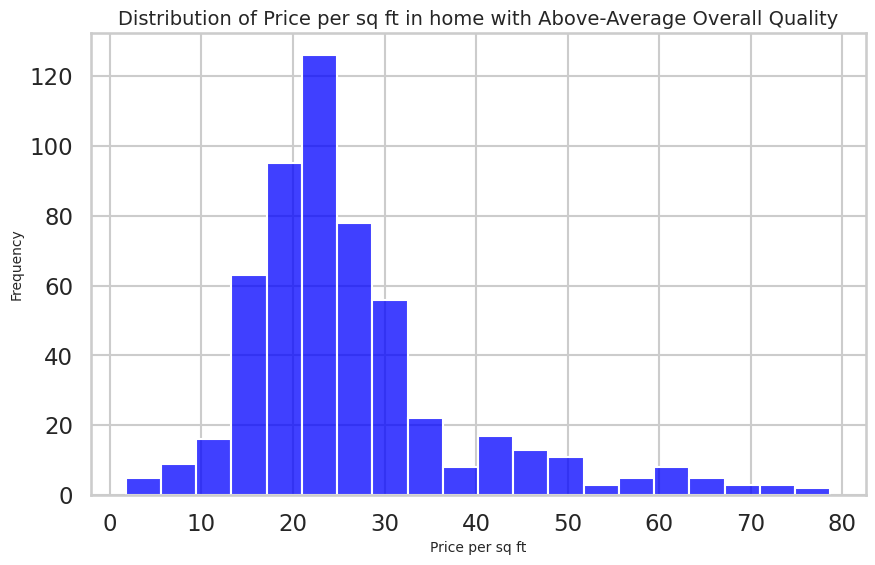

In [ ]:
# checking the distribution of the Price per sq ft in home with Above-Average Overall Quality
plt.figure(figsize=(10, 6))
sns.histplot(x=above_avg_quality_df['Price per sq ft'], bins=20, color='blue')
plt.title('Distribution of Price per sq ft in home with Above-Average Overall Quality', fontsize=14)
plt.xlabel('Price per sq ft', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()


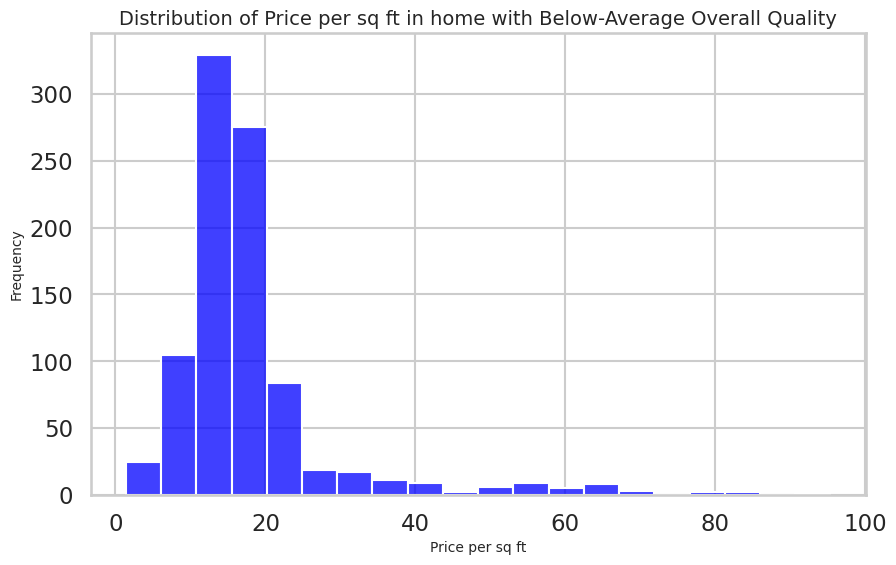

In [ ]:
# checking the distribution of the Price per sq ft in home with Below-Average Overall Quality
plt.figure(figsize=(10, 6))
sns.histplot(x=below_avg_quality_df['Price per sq ft'], bins=20, color='blue')
plt.title('Distribution of Price per sq ft in home with Below-Average Overall Quality', fontsize=14)
plt.xlabel('Price per sq ft', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

The difference in means at the 95% confidence interval is between 7.329556929242351 and 9.868046928348924.
TtestResult(statistic=13.632173799144596, pvalue=6.447839019158312e-40, df=1458.0)


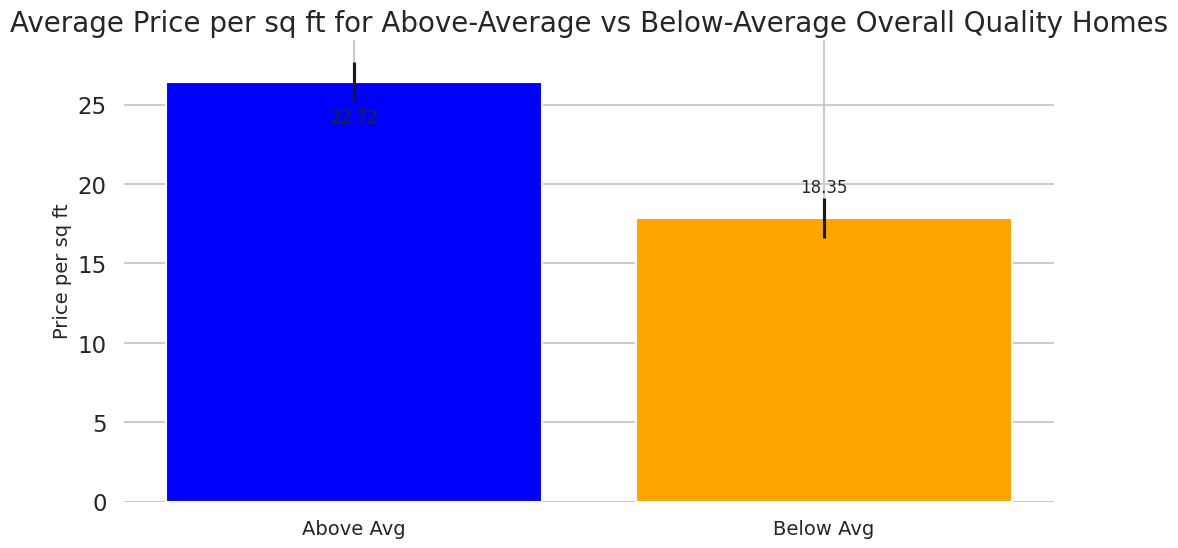

In [72]:
# run two sample t-test
t_test = stats.ttest_ind(above_avg_quality_df["Price per sq ft"], below_avg_quality_df["Price per sq ft"])
#confidence interval range for the difference in means
sample_1_n = below_avg_quality_df.shape[0]
sample_2_n = above_avg_quality_df.shape[0]
sample_1_mean = below_avg_quality_df['Price per sq ft'].mean()
sample_2_mean = above_avg_quality_df['Price per sq ft'].mean()
sample_1_var = below_avg_quality_df['Price per sq ft'].var()
sample_2_var = above_avg_quality_df['Price per sq ft'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

plt.figure(figsize=(12, 6))
plt.bar(['Above Avg', 'Below Avg'], [sample_2_mean, sample_1_mean], yerr=margin_of_error, color=['blue', 'orange'])
plt.title('Average Price per sq ft for Above-Average vs Below-Average Overall Quality Homes', fontsize=20)
plt.ylabel('Price per sq ft', fontsize=14)

for i, v in enumerate(y):
    plt.text(i, v + 0.9, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print(t_test)

The results indicate a statistically significant difference in the average price per square foot between houses with above average overall quality score and houses with below average overall quality score. The confidence interval of (7.32-9.86) suggests that, with 95% confidence, the average price per square foot for houses with above average overall quality score is estimated to be higher by approximately 7-10 dollars compared to houses with below average overall quality score. Additionally, the small p-value of 6.447839019158312e-40 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

## Hypothese 3:
### Alternative Hypothesis (HA): There is a significant difference in the mean price per square foot between above-average quality homes in the top 10 neighborhoods and other homes.
Ha: μ1 - μ2 ≠ 0

T-Test Results:
T-Statistic: 11.189542248790618
P-Value: 1.7714406722025997e-27
Confidence Interval (95%): (5.901811080114816, 8.410916102458284)


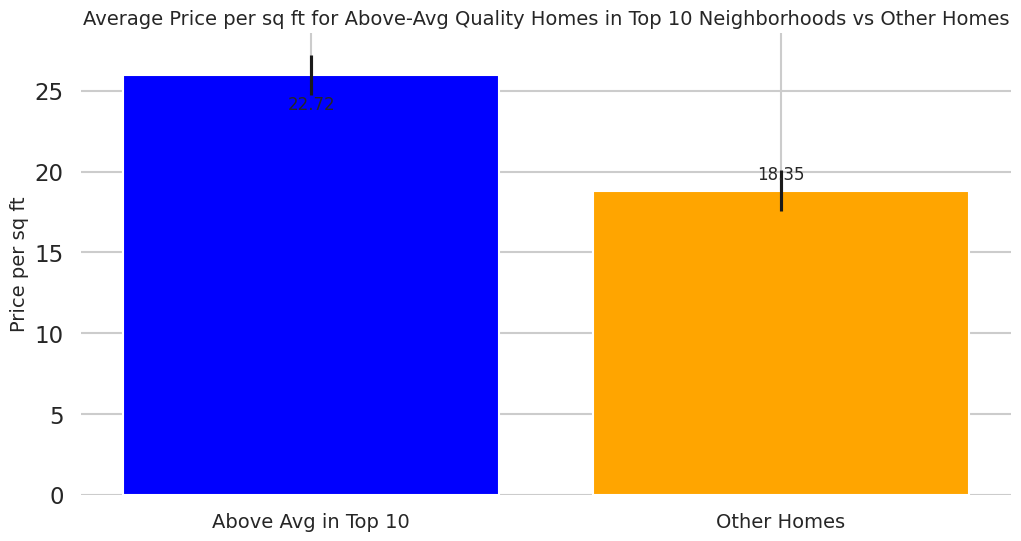

In [75]:
# Get the top 10 neighborhoods with the most count of above-average OverallQual
top_10_neighborhoods_above_avg_qual = hp_df[hp_df['OverallQual'] > hp_df['OverallQual'].mean()].groupby('Neighborhood').size().nlargest(10).index.tolist()

# the data into two groups: above-average quality homes in the top 10 neighborhoods and other homes
aaqh_top10neigh_df = hp_df[(hp_df['OverallQual'] > hp_df['OverallQual'].mean()) & (hp_df['Neighborhood'].isin(top_10_neighborhoods_above_avg_qual))]
other_homes_df = hp_df[(hp_df['OverallQual'] <= hp_df['OverallQual'].mean()) | (~hp_df['Neighborhood'].isin(top_10_neighborhoods_above_avg_qual))]

# Exclude missing values from 'Price per sq ft' column
aaqh_top10neigh_prices = aaqh_top10neigh_df['Price per sq ft'].dropna()
other_homes_prices = other_homes_df['Price per sq ft'].dropna()

# Exclude NaN values from each group
aaqh_top10neigh_prices = aaqh_top10neigh_prices[~np.isnan(aaqh_top10neigh_prices)]
other_homes_prices = other_homes_prices[~np.isnan(other_homes_prices)]

# t-test
t_statistic, p_value = stats.ttest_ind(aaqh_top10neigh_prices, other_homes_prices, equal_var=False)

n1 = len(aaqh_top10neigh_prices)
n2 = len(other_homes_prices)
df = n1 + n2 - 2

se1 = np.std(aaqh_top10neigh_prices, ddof=1) / np.sqrt(n1)
se2 = np.std(other_homes_prices, ddof=1) / np.sqrt(n2)

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

# CI
mean_diff = aaqh_top10neigh_prices.mean() - other_homes_prices.mean()
margin_of_error = t_critical * np.sqrt(se1**2 + se2**2)
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

plt.figure(figsize=(12, 6))
plt.bar(['Above Avg in Top 10', 'Other Homes'], [aaqh_top10neigh_prices.mean(), other_homes_prices.mean()], yerr=margin_of_error, color=['blue', 'orange'])
plt.title('Average Price per sq ft for Above-Avg Quality Homes in Top 10 Neighborhoods vs Other Homes', fontsize=14)
plt.ylabel('Price per sq ft', fontsize=14)

for i, v in enumerate(y):
    plt.text(i, v + 0.9, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Confidence Interval (95%):", confidence_interval)

The results indicate a statistically significant difference in the average price per square foot between above average quality homes in the top neighbordhoods and the other homes. The confidence interval of (5.9-8.4) suggests that, with 95% confidence, the average price per square foot for houses with above average overall quality homes in the top neighborhoods is estimated to be higher by approximately 6-8 dollars compared to other homes. Additionally, the small p-value of 1.7714406722025997e-27 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

## Hypthesis 6
### Alternative Hypothesis(HA): There is a signigicant difference in the mean price per sq ft between homes built after the year 2000 and homes built before the year 2000

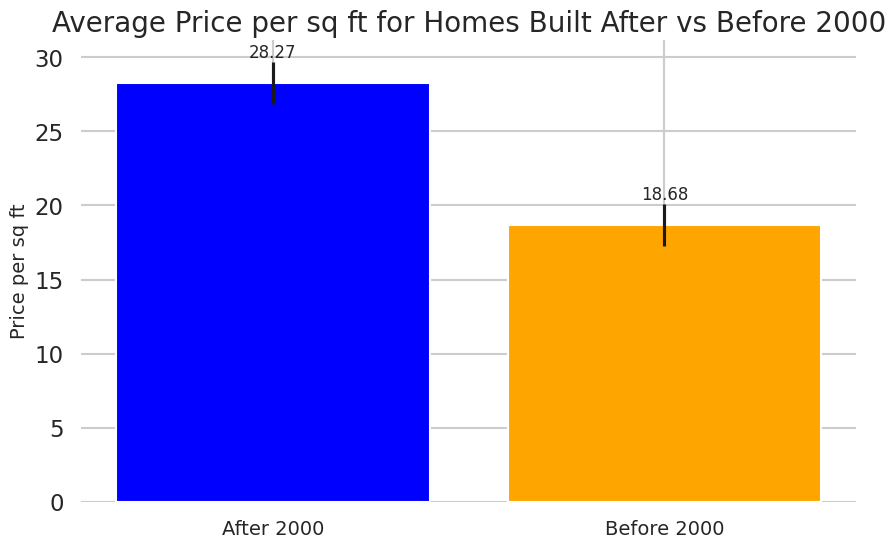

T-Test Results:
T-Statistic: 13.583367749932975
P-Value: 1.166027845190789e-39
Confidence Interval: (8.151521720992239, 11.03594099992014)


In [82]:
# Split the data into two groups based on the year_built column
after_2000 = hp_df[hp_df['YearBuilt'] > 2000]['Price per sq ft']
before_2000 = hp_df[hp_df['YearBuilt'] <= 2000]['Price per sq ft']

# t-test
t_statistic, p_value = stats.ttest_ind(after_2000, before_2000)

# CI
mean_diff = after_2000.mean() - before_2000.mean()
std_diff = after_2000.std() - before_2000.std()
n1, n2 = len(after_2000), len(before_2000)
standard_error = np.sqrt((after_2000.var()/n1) + (before_2000.var()/n2))
margin_of_error = stats.t.ppf(0.975, n1+n2-2) * standard_error
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

plt.figure(figsize=(10, 6))
bars = plt.bar(['After 2000', 'Before 2000'], [after_2000.mean(), before_2000.mean()],yerr=margin_of_error, color=['blue', 'orange'])

plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() + margin_of_error + 0.01, round(after_2000.mean(), 2), ha='center', va='bottom', fontsize=12)
plt.text(bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height() + margin_of_error + 0.01, round(before_2000.mean(), 2), ha='center', va='bottom', fontsize=12)

plt.title('Average Price per sq ft for Homes Built After vs Before 2000', fontsize=20)
plt.ylabel('Price per sq ft', fontsize=14)


sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)
plt.show()

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Confidence Interval:", confidence_interval)


The results indicate a statistically significant difference in the average price per square foot between homes built after the year 2000 and homes built before the year 2000. The confidence interval of (8.15, 11.04) suggests that, with 95% confidence, the average price per square foot for homes built after the year 2000 is estimated to be higher by approximately 8-11 dollars compared to homes built before the year 2000. Additionally, the small p-value of 1.166027845190789e-39 provides strong evidence against the null hypothesis, indicating that the observed difference is unlikely to have occurred by chance alone.

## Hypothesis 7
Alternative Hypothesis(HA): There is a significant difference in the mean price per square foot between above-average quality homes in the top 10 neighborhoods  bulit after 2000 and above-average quality homes in the top 10 neighborhoods bulit before 2000

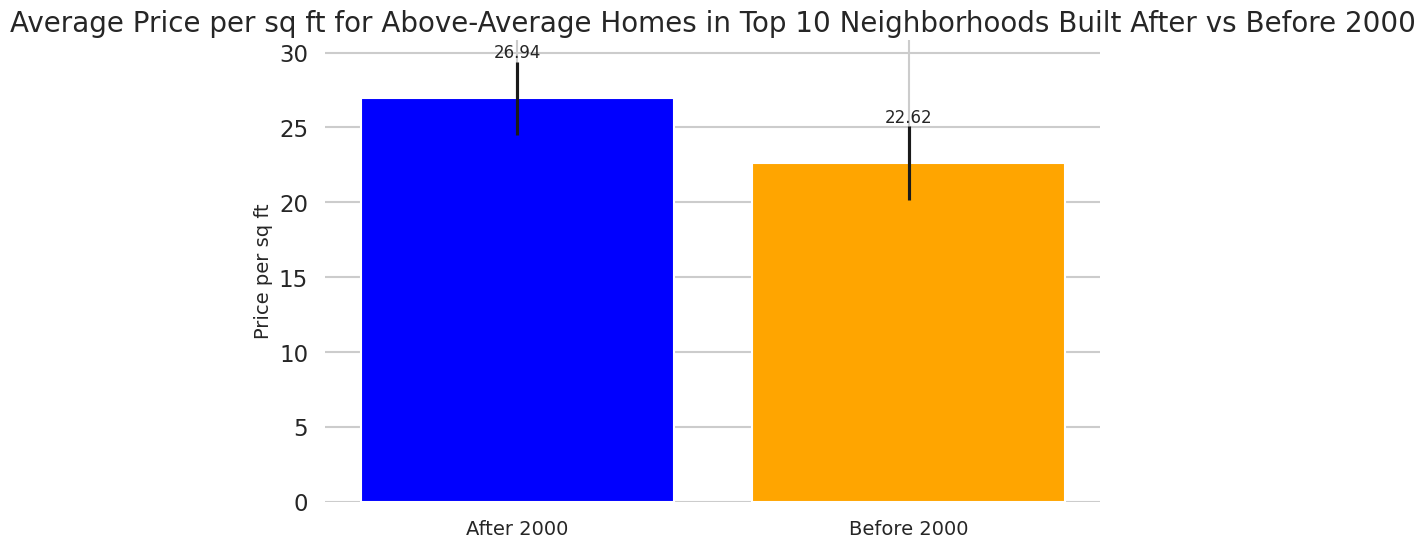

T-Test Results:
T-Statistic: 3.7051164460575583
P-Value: 0.0002421498089482465
Confidence Interval: (1.8650245550120443, 6.7709506405727256)


In [83]:
# splitting the data
after_2000 = hp_df[(hp_df['YearBuilt'] > 2000) & (hp_df['OverallQual'] > hp_df['OverallQual'].mean()) & (hp_df['Neighborhood'].isin(hp_df['Neighborhood'].value_counts().nlargest(10).index))]
before_2000 = hp_df[(hp_df['YearBuilt'] <= 2000) & (hp_df['OverallQual'] > hp_df['OverallQual'].mean()) & (hp_df['Neighborhood'].isin(hp_df['Neighborhood'].value_counts().nlargest(10).index))]

#t-test
t_statistic, p_value = stats.ttest_ind(after_2000['Price per sq ft'], before_2000['Price per sq ft'])

# CI
mean_diff = after_2000['Price per sq ft'].mean() - before_2000['Price per sq ft'].mean()
std_diff = after_2000['Price per sq ft'].std() - before_2000['Price per sq ft'].std()
n1, n2 = len(after_2000), len(before_2000)
standard_error = np.sqrt((after_2000['Price per sq ft'].var()/n1) + (before_2000['Price per sq ft'].var()/n2))
margin_of_error = stats.t.ppf(0.975, n1+n2-2) * standard_error
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
#chart
plt.figure(figsize=(10, 6))
bars = plt.bar(['After 2000', 'Before 2000'], [after_2000['Price per sq ft'].mean(), before_2000['Price per sq ft'].mean()], yerr=margin_of_error, color=['blue', 'orange'])

plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() + margin_of_error + 0.01, round(after_2000['Price per sq ft'].mean(), 2), ha='center', va='bottom', fontsize=12)
plt.text(bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height() + margin_of_error + 0.01, round(before_2000['Price per sq ft'].mean(), 2), ha='center', va='bottom', fontsize=12)

plt.title('Average Price per sq ft for Above-Average Homes in Top 10 Neighborhoods Built After vs Before 2000', fontsize=20)
plt.ylabel('Price per sq ft', fontsize=14)
sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(fontsize=14)
plt.show()

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Confidence Interval:", confidence_interval)



The t-test results show a significant difference in the mean price per square foot between above-average quality homes in the top 10 neighborhoods built after 2000 and above-average quality homes in the top 10 neighborhoods built before 2000. The t-statistic of 3.705 indicates a positive difference, suggesting that homes built after 2000 have a higher mean price per square foot. The p-value of 0.000242 suggests strong evidence against the null hypothesis. The 95% confidence interval of (1.865, 6.771) indicates that the mean price per square foot for homes built after 2000 is likely to be between 2-7 dollars higher than for homes built before 2000.

## Results

After conducting statistical analysis (t-tests) on 10 hypotheses, it can be concluded that the following factors contribute to a higher price per square foot:

- Above-average overall quality score - This suggests that buyers are willing to pay more for homes that are built with better materials and have superior craftsmanship.
- Larger-than-average living areas - This could be because larger living spaces provide more comfort and functionality, which is valued by buyers.
- A garage that can accommodate more cars than the average - This suggests that having ample garage space is considered desirable by buyers, potentially for storing multiple vehicles or providing additional storage space.
- A basement area larger than the average - Basements can provide additional living space or storage, and buyers may be willing to pay more for homes with larger basement areas.
- A first floor larger than the average - This could be because larger first floors offer more living space and flexibility in terms of room layout and functionality
- Below-average overall condition score - This could be due to factors such as historical significance, unique architectural features, or potential for renovation and improvement.
- Homes built after the year 2000 - This suggests that newer homes, with modern amenities and construction standards, are valued more by buyers.

Furthermore, by focusing on above-average quality homes built after the year 2000 in the top neighborhoods, the analysis found that this combination can further contribute to a higher price per square foot. This indicates that buyers are willing to pay a premium for newer, high-quality homes located in desirable neighborhoods.


## Recommendations
I can conclude that homes buyers in Ames, Iowa prioritize well-built homes with superior craftsmanship and materials. They also value space and are willing to pay more for homes that offer ample living and storage space, and may be willing to overlook some condition issues if the home possesses other desirable features or characteristics. However, these buyers tend to have a preference for newer construction, which may offer modern amenities, updated designs, and adherence to current building standards. Lastly, these buyers are willing to pay a premium for homes located in desirable neighborhoods with a reputation for quality and desirability. Overall, these conclusions suggest that home buyers prioritize quality, space, newer construction, and desirable locations when making purchasing decisions. With that being said, I recommend we:

1. Focus on high quality properties - conducting thorough due diligence on the underlying properties and ensuring they meet certain quality criteria.
2. Consider property size
3. Access proerty condition
4. Consider market trends - Monitor market trends and consider the demand for newer homes
5. Diversify the portfolio - Investing in a mix of mortgage-backed securities backed by properties with different characteristics, such as varying quality scores, sizes, conditions, and construction years. Diversification can help mitigate the impact of any specific property or market-related risks